In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")

In [3]:
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [5]:
df.shape


(9550, 5)

In [6]:
df.describe()

,Count
count,9547.000000
mean,103.627632
std,275.189303
min,0.000000
25%,0.000000
50%,12.000000
75%,70.500000
max,3148.000000


In [7]:
df.describe(include= "object")

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident
count,9550,9550,9550,9550
unique,50,6,35,5
top,Agra,Road Features,Others,Greviously Injured
freq,191,2000,1450,2000


In [8]:
df.isnull().sum()

,0
Million Plus Cities,0
Cause category,0
Cause Subcategory,0
Outcome of Incident,0
Count,3


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["Count"] = df["Count"].fillna(0)

In [11]:

!pip install plotly

In [32]:
import pandas as pd


/tmp/ipython-input-3005279642.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




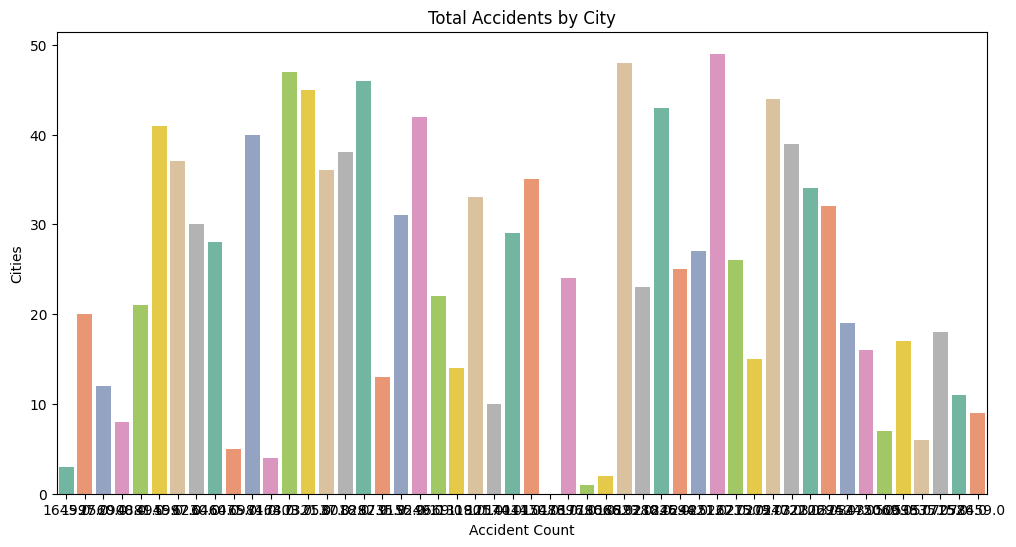

In [41]:
plt.figure(figsize=(12,6))

city_data = df.groupby("Million Plus Cities")["Count"].sum().reset_index()

sns.barplot(
    y="Million Plus Cities",
    x="Count",
    data=city_data,
    palette="Set2"
)

plt.title("Total Accidents by City")
plt.xlabel("Accident Count")
plt.ylabel("Cities")

plt.show()


/tmp/ipython-input-1689179668.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




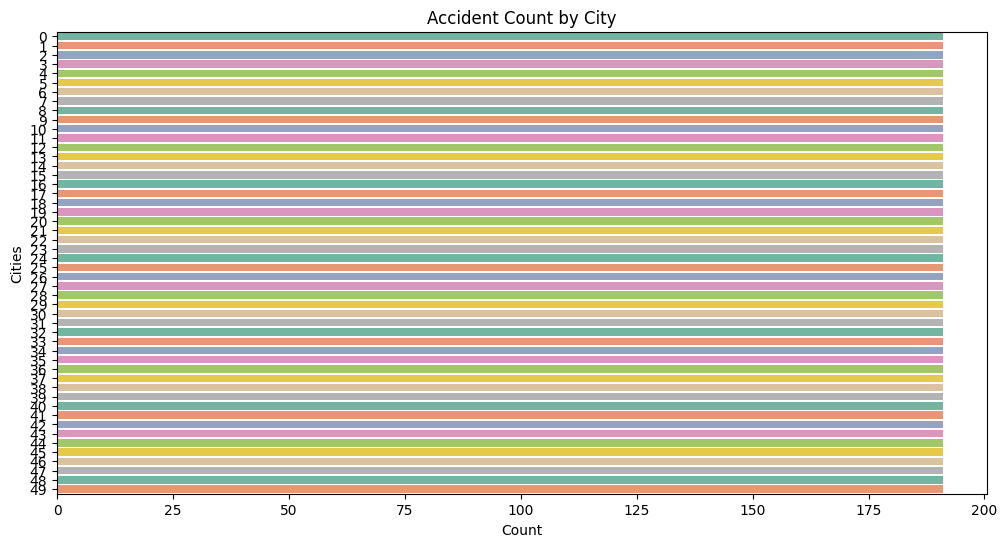

In [40]:
plt.figure(figsize=(12,6))

sns.countplot(
    y="Million Plus Cities",
    data=df,
    palette="Set2"
)

plt.title("Accident Count by City")
plt.xlabel("Count")
plt.ylabel("Cities")

plt.show()


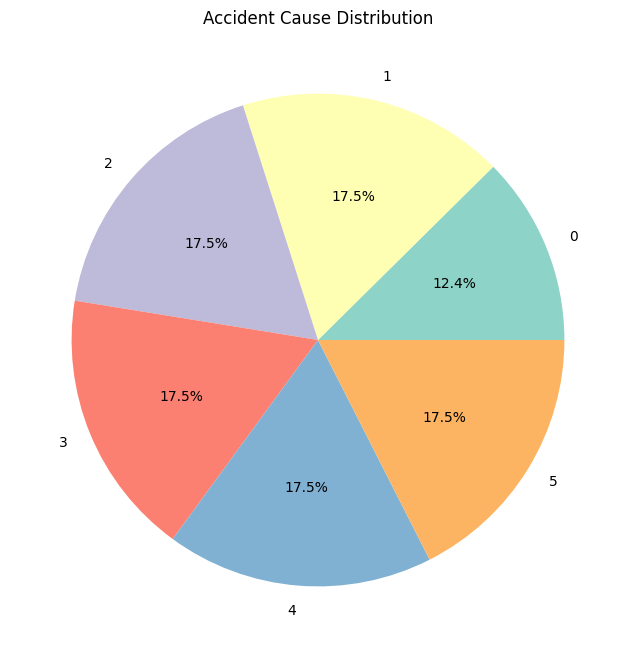

In [42]:
plt.figure(figsize=(8,8))

cause_data = df.groupby("Cause category")["Count"].sum()

plt.pie(
    cause_data,
    labels=cause_data.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set3")
)

plt.title("Accident Cause Distribution")

plt.show()


/tmp/ipython-input-3793090091.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




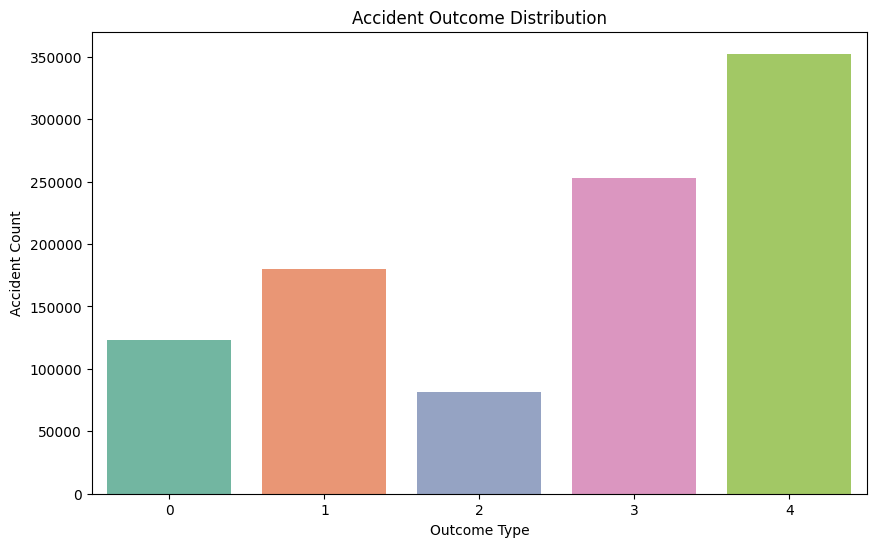

In [43]:
plt.figure(figsize=(10,6))

outcome_data = df.groupby("Outcome of Incident")["Count"].sum().reset_index()

sns.barplot(
    x="Outcome of Incident",
    y="Count",
    data=outcome_data,
    palette="Set2"
)

plt.title("Accident Outcome Distribution")
plt.xlabel("Outcome Type")
plt.ylabel("Accident Count")

plt.show()


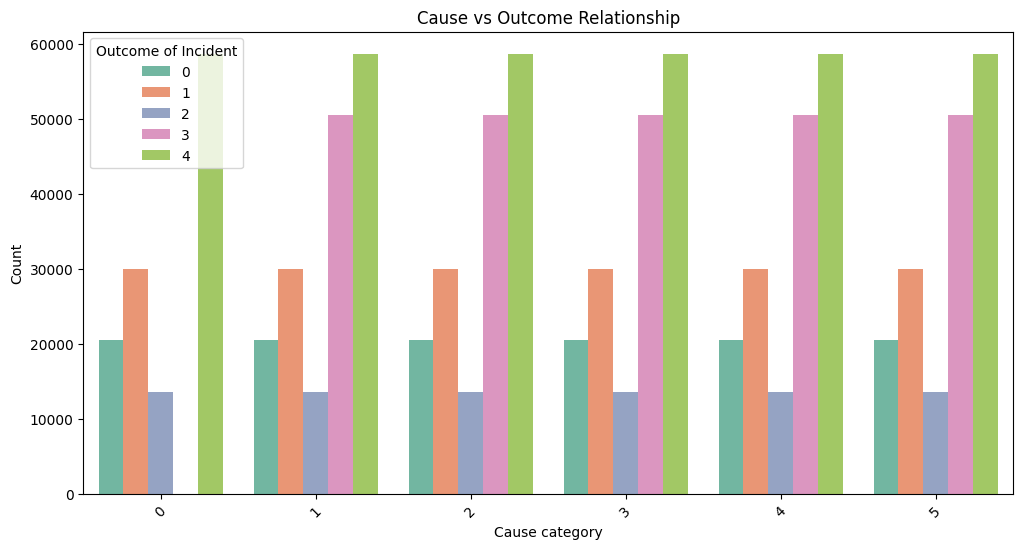

In [44]:
plt.figure(figsize=(12,6))

pivot = df.groupby(
    ["Cause category", "Outcome of Incident"]
)["Count"].sum().reset_index()

sns.barplot(
    x="Cause category",
    y="Count",
    hue="Outcome of Incident",
    data=pivot,
    palette="Set2"
)

plt.title("Cause vs Outcome Relationship")
plt.xticks(rotation=45)

plt.show()


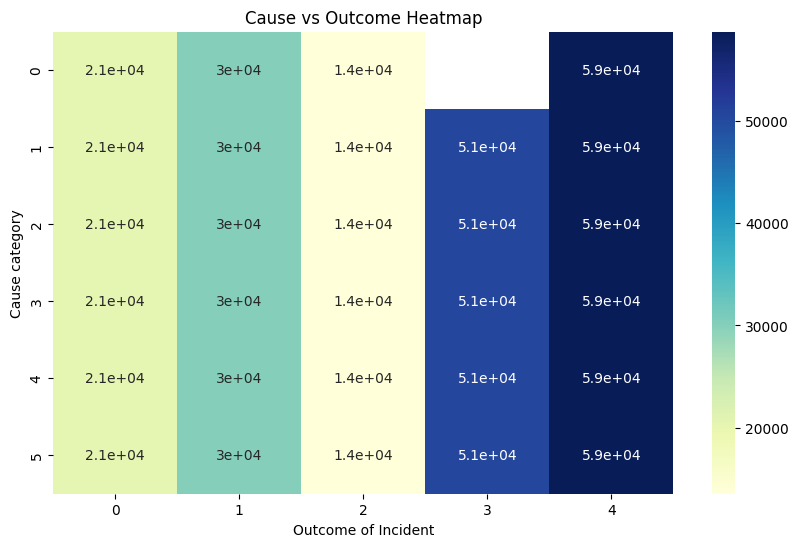

In [45]:
plt.figure(figsize=(10,6))

heatmap_data = df.pivot_table(
    values="Count",
    index="Cause category",
    columns="Outcome of Incident",
    aggfunc="sum"
)

sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu"
)

plt.title("Cause vs Outcome Heatmap")

plt.show()


In [18]:
!pip install scikit-learn

In [19]:
import pandas as pd
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")

In [21]:
le_city = LabelEncoder()
le_cause = LabelEncoder()
le_sub = LabelEncoder()
le_outcome = LabelEncoder()

# Fit encoders on ORIGINAL TEXT
le_city.fit(df["Million Plus Cities"])
le_cause.fit(df["Cause category"])
le_sub.fit(df["Cause Subcategory"])
le_outcome.fit(df["Outcome of Incident"])

LabelEncoder()

In [22]:
df["Million Plus Cities"] = le_city.transform(df["Million Plus Cities"])
df["Cause category"] = le_cause.transform(df["Cause category"])
df["Cause Subcategory"] = le_sub.transform(df["Cause Subcategory"])
df["Outcome of Incident"] = le_outcome.transform(df["Outcome of Incident"])

In [23]:
df["Accident_Risk"] = df["Count"] / df["Count"].max()
df["City_Accident_Frequency"] = df.groupby("Million Plus Cities")["Count"].transform("sum")
df["Cause_Severity"] = df.groupby("Cause category")["Count"].transform("mean")

In [24]:
X = df[
    [
        "Count",
        "Cause category",
        "Cause Subcategory",
        "Million Plus Cities",
        "Accident_Risk",
        "City_Accident_Frequency",
        "Cause_Severity"
    ]
]

y = df["Outcome of Incident"]

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [27]:
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [28]:
joblib.dump(model, "accident_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_city, "city_encoder.pkl")
joblib.dump(le_cause, "cause_encoder.pkl")
joblib.dump(le_sub, "sub_encoder.pkl")
joblib.dump(le_outcome, "outcome_encoder.pkl")

['outcome_encoder.pkl']

In [29]:
from google.colab import files

files.download("accident_model.pkl")
files.download("scaler.pkl")
files.download("city_encoder.pkl")
files.download("cause_encoder.pkl")
files.download("sub_encoder.pkl")
files.download("outcome_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>